# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

To achieve the goal of finding what drives the prices of the car CRISP-DM model can be used for process guidance. Following approach can be used

Data understanding - Explore the provided data, visualize using plots, check for completness, identifiy if any conversions need to be applied to categorical and numerical data
    
Data Preparaion - Clean and apply indentified transformations

Modeling - Perform modeling using regression model like Linear regression and Lasso. Compare model performance using MSE.

Evaluation - Using the selected modle, identify what features impact the price of the car most and if any further re-evaluation needed

Deployment - Share the findings with Business with recommendations for deployment. 

Once deployment the system can be monitored for performance and make necessary adjustments as needed.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score



In [2]:
data = pd.read_csv('data/vehicles.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [5]:
data.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
17518,7312981898,fayetteville,17900,2018.0,chrysler,pacifica,NaN,NaN,gas,119402.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ar
65014,7311967760,stockton,0,2018.0,toyota,corolla,NaN,NaN,gas,16588.0,clean,automatic,5YFBURHE1JP790756,fwd,full-size,sedan,silver,ca
110233,7307674541,sarasota-bradenton,19997,2011.0,NaN,Other MV-1,NaN,8 cylinders,NaN,120561.0,clean,automatic,523MF1A64BM100441,rwd,NaN,NaN,white,fl
25132,7302759312,chico,19990,2013.0,volkswagen,eos sport convertible,good,NaN,gas,24294.0,clean,automatic,WVWBW8AH7DV003769,fwd,NaN,convertible,blue,ca
251364,7309731081,central NJ,21990,2015.0,lexus,es 350 sedan 4d,good,NaN,other,64610.0,clean,other,JTHBK1GG2F2205469,fwd,NaN,sedan,white,nj
161664,7311929310,omaha / council bluffs,34988,2012.0,dodge,2500,NaN,NaN,diesel,97832.0,clean,automatic,3C6UD5ML4CG236763,NaN,NaN,NaN,NaN,ia
123120,7315106637,atlanta,10500,2007.0,ford,f150,like new,NaN,gas,73000.0,clean,automatic,NaN,NaN,NaN,NaN,white,ga
269378,7305686639,finger lakes,38990,2020.0,infiniti,qx60 luxe sport utility,good,6 cylinders,gas,5279.0,clean,other,5N1DL0MN9LC508268,fwd,NaN,other,black,ny
302654,7304197176,toledo,45990,2019.0,jeep,wrangler unlimited rubicon,good,NaN,other,9857.0,clean,other,1C4HJXFG1KW595325,4wd,NaN,SUV,NaN,oh
268183,7302724088,buffalo,9899,2015.0,hyundai,sonata,NaN,4 cylinders,gas,112386.0,clean,automatic,NaN,fwd,full-size,sedan,black,ny


In [6]:
data.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Visualization


In [57]:
# For visualization choosing to drop null values
data_vis = data.dropna()

# Information like VIN, region , state are dropped as they are features of car
data_vis.drop(['VIN', 'region', 'state'], axis=1, inplace=True)

#### Visualiszation of categorical and contious variables

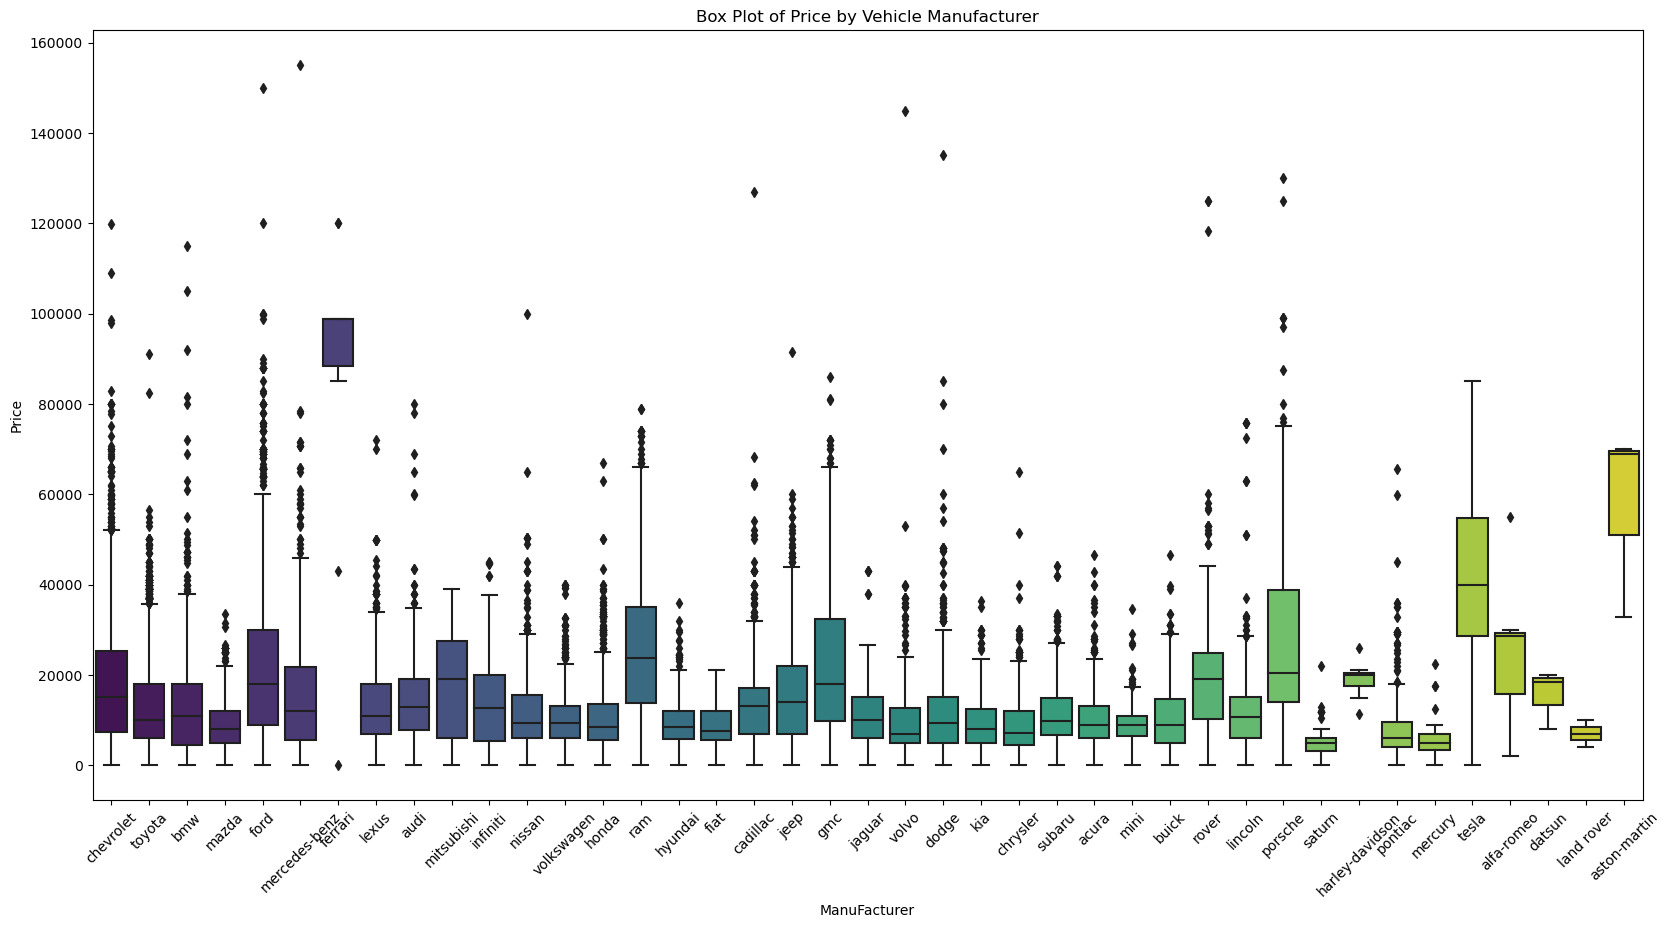

In [8]:
# Example for a continuous variable 'price' across categories of 'manufacturer' using sns
plt.figure(figsize=(20, 10))
sns.boxplot(x='manufacturer', y='price', data=data_vis, palette='viridis')
plt.xlabel('ManuFacturer')
plt.ylabel('Price')
plt.title('Box Plot of Price by Vehicle Manufacturer')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

#### Visualization of correlatoion with heatmap

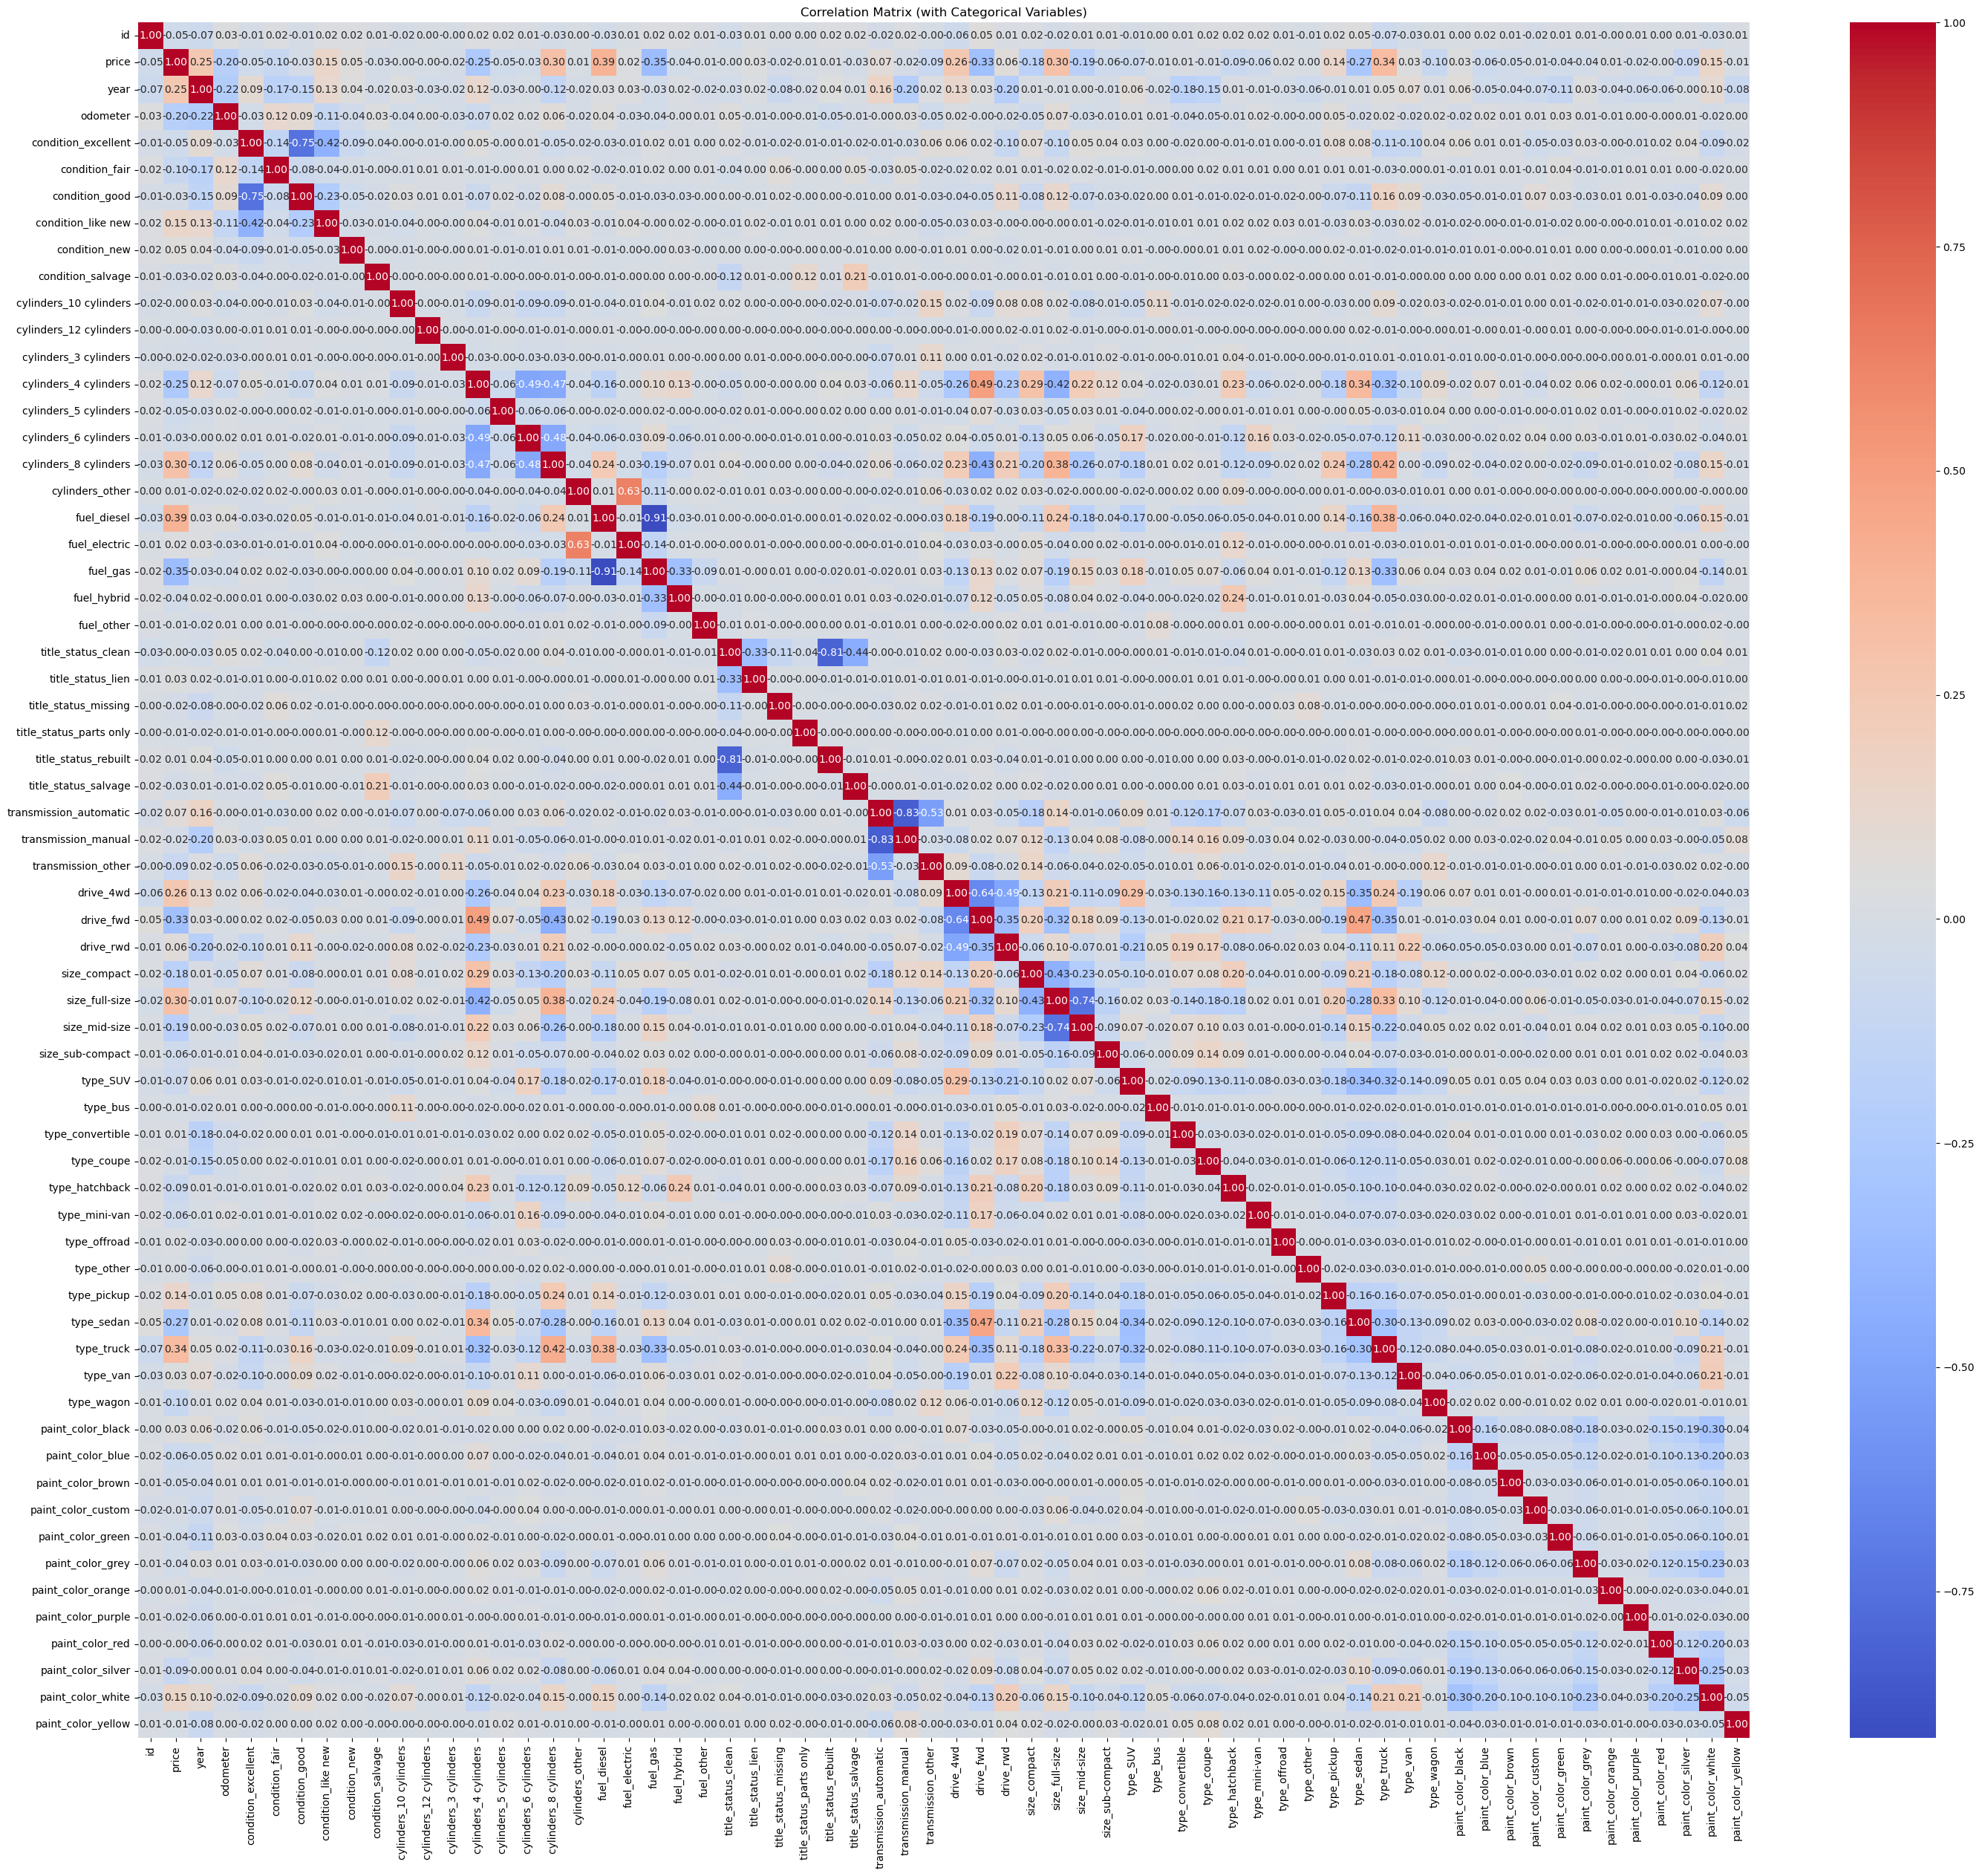

In [9]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(data_vis, columns=['condition','cylinders','fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'])

df_encoded.drop(['manufacturer','model'], axis =1, inplace=True)
# Compute correlation matrix including categorical variables
corr_matrix = df_encoded.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(35, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (with Categorical Variables)')
plt.show()

#### Visualizaton of two continuous variables

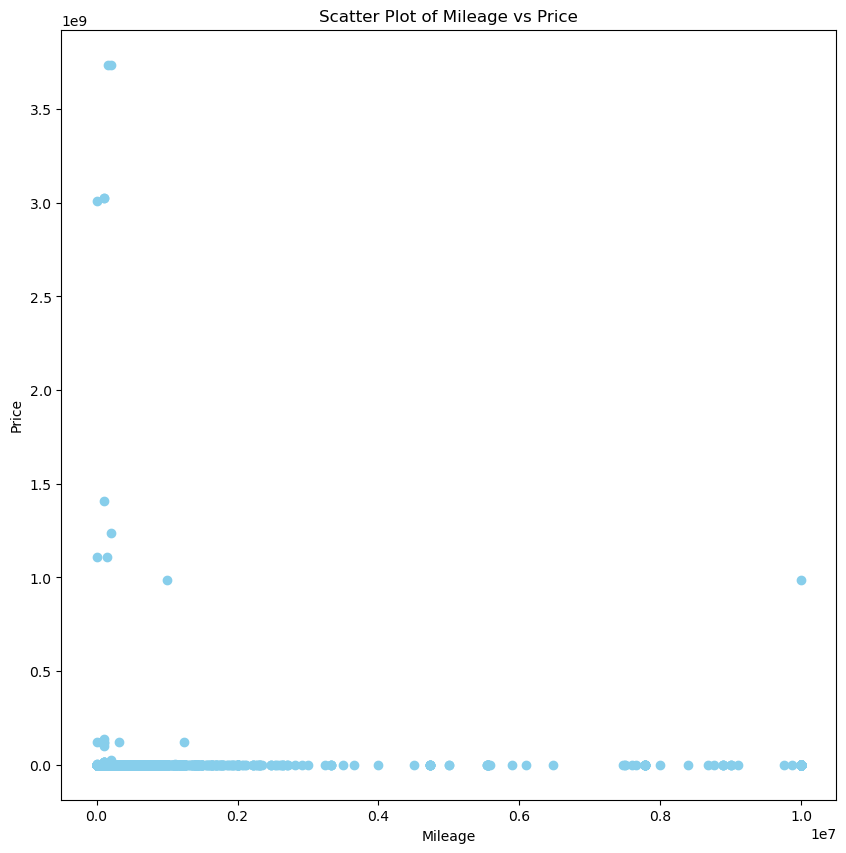

In [10]:
# Example for two continuous variables 'mileage' and 'price'
plt.figure(figsize=(10, 10))
plt.scatter(data['odometer'], data['price'], color='skyblue')

plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Scatter Plot of Mileage vs Price')
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Drop missing data
The missing data are dropped after performing first round of modelling as the MSE & R Squared error indicate the model performed poorly. 
See below for reference

Linear Regression Root Mean Squared Error: 112675.9517322838

R-squared: 0.009024895012289313

In [ ]:
data.dropna(inplace=True)

##### Drop Outliers
Calculate Z-scores and drop outliers

In [11]:


# Calculate z-scores
z_scores = np.abs((data['price'] - data['price'].mean()) / data['price'].std())

# Define threshold for outliers
threshold = 3

# Drop outliers
outlier_rows = data.index[z_scores > threshold]

data = data.drop(index = outlier_rows)

print("Dropped rows:\n", outlier_rows)

print()

Dropped rows:
 Index([   346,    365,    857,   4803,   4826,   5044,   5048,   5064,   5190,
         5223,
       ...
       416224, 419656, 420693, 421437, 423926, 425455, 425491, 426506, 426692,
       426778],
      dtype='int64', length=418)



In [12]:
data.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
317884,7310883840,eugene,11995,2014.0,toyota,sienna,excellent,6 cylinders,gas,158666.0,clean,automatic,5TDZK3DC3ES405698,fwd,full-size,mini-van,red,or
202135,7308392922,grand rapids,36955,2015.0,dodge,challenger,excellent,8 cylinders,gas,47681.0,clean,automatic,2C3CDZDJ4FH788220,rwd,mid-size,coupe,blue,mi
255039,7312755603,north jersey,28900,2018.0,ford,transit,good,6 cylinders,gas,70600.0,clean,other,1FTYR2CMXJKA09068,rwd,mid-size,van,white,nj
150779,7311965870,fort wayne,5420,2010.0,subaru,forester 2.5x limited,good,4 cylinders,gas,199876.0,clean,automatic,JF2SH6DC9AH741390,4wd,mid-size,wagon,red,in
166526,7311875587,"kansas city, MO",8950,2005.0,nissan,xterra offroad,excellent,6 cylinders,gas,152000.0,clean,manual,5N1AN08W45C635531,4wd,mid-size,SUV,black,ks
186756,7315222551,boston,0,2014.0,jeep,grand cherokee limited 4x4,new,6 cylinders,diesel,120.0,clean,automatic,1C4RJFBG6EC131280,4wd,full-size,SUV,white,ma
5220,7315658015,anchorage / mat-su,44995,2017.0,chevrolet,silverado 1500 ltz 4x4,like new,8 cylinders,gas,94201.0,clean,automatic,3GCUKSEC4HG249984,4wd,full-size,truck,white,ak
84543,7311390661,hartford,49990,2015.0,ford,super duty f-550 drw,good,8 cylinders,diesel,152701.0,clean,automatic,1FD0X5HT6FEC65813,4wd,full-size,truck,white,ct
310362,7304291272,tulsa,0,2018.0,chevrolet,silverado 1500,excellent,8 cylinders,gas,37882.0,clean,automatic,3GCUKREC7JG465892,4wd,mid-size,truck,black,ok
104052,7309884375,okaloosa / walton,8995,2014.0,dodge,avenger se,excellent,4 cylinders,gas,63446.0,clean,automatic,1C3CDZAB6EN169136,fwd,mid-size,sedan,red,fl


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34450 entries, 126 to 426836
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            34450 non-null  int64  
 1   region        34450 non-null  object 
 2   price         34450 non-null  int64  
 3   year          34450 non-null  float64
 4   manufacturer  34450 non-null  object 
 5   model         34450 non-null  object 
 6   condition     34450 non-null  object 
 7   cylinders     34450 non-null  object 
 8   fuel          34450 non-null  object 
 9   odometer      34450 non-null  float64
 10  title_status  34450 non-null  object 
 11  transmission  34450 non-null  object 
 12  VIN           34450 non-null  object 
 13  drive         34450 non-null  object 
 14  size          34450 non-null  object 
 15  type          34450 non-null  object 
 16  paint_color   34450 non-null  object 
 17  state         34450 non-null  object 
dtypes: float64(2), int64(2), obj

Group Categorical and Numerical features

In [14]:
categorical_features = [ 'manufacturer', 'model', 'condition','cylinders','fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
numerical_features = ['year', 'odometer']


Select the features and target

In [15]:

X = data.drop(['price'], axis=1)
y = data['price']

Create pipeline for numerical features

In [16]:
# Define pipeline for numeric features with SimpleImputer and StandardScaler
numerical_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize features
])

Create pipeline for categorical features

In [17]:
# Create preprocessing pipeline for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [18]:
# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

Split data into training and testing sets

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Preprocess data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Linear Regression

In [21]:
# Instantiate Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train_processed, y_train)

# Predict on the test set
y_pred_linear = linear_regressor.predict(X_test_processed)



##### RMSE

In [23]:
rmse = np.sqrt(mse_linear)
print("Linear Regression Root Mean Squared Error:", rmse)

Linear Regression Root Mean Squared Error: 9265.027254257653


##### R-Squared

In [24]:

r_squared = r2_score(y_test, y_pred_linear)
print("R-squared:", r_squared)

R-squared: 0.3977225502782602


##### Linear Regression Coefficients

In [25]:
# Get coefficients for Linear Regression
coefficients = linear_regressor.coef_

# Get feature names after preprocessing
preprocessed_feature_names = []

# Numerical feature names
preprocessed_feature_names.extend(numerical_features)

# Categorical feature names after one-hot encoding
categorical_encoder = preprocessor.named_transformers_['cat']
encoded_categorical_features = categorical_encoder.named_steps['encoder'].get_feature_names_out(input_features=categorical_features)
preprocessed_feature_names.extend(encoded_categorical_features)

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': preprocessed_feature_names, 'Coefficient': coefficients})

# Display the DataFrame
print(coefficients_df)

                        Feature   Coefficient
0                          year   4790.506252
1                      odometer  -1404.146266
2            manufacturer_acura  -5768.430764
3       manufacturer_alfa-romeo   6703.409796
4     manufacturer_aston-martin  11631.758793
...                         ...           ...
4591         paint_color_purple    696.701102
4592            paint_color_red     41.409298
4593         paint_color_silver   -410.535288
4594          paint_color_white  -1002.840409
4595         paint_color_yellow   -989.872129

[4596 rows x 2 columns]


#### Lasso Regression model

In [26]:
# Pipeline with preprocessing and lasso regressor model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())  
])


#### Hyperparameters for grid search

In [27]:
# Hyperparameters grid for grid search
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1.0],  # Lasso alpha parameter
}

#### Grid search with cross-validation

In [28]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/Users/manik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471197117353.7301, tolerance: 317683590.74073094
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/manik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139724978964.38385, tolerance: 318976120.9243669
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/manik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481570648988.2489, tolerance: 314552119.1179096
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/manik/anaconda3/lib/python3.11/site-packages/sklearn

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['manufacturer',
                                                                          'model',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'drive',
                                                                          'size',
                                                                          'type',
                                                                          'paint_color'])])),
                                       ('regressor', Lasso())]),
             param_grid={'regressor__alpha': [0.01, 0.1, 1.0]},
             scoring='neg_mean_squared_error')

#### Get the best model

In [29]:
# Get best model from grid search
best_model = grid_search.best_estimator_

### Evaluate the best model 
##### For evaluation looking at RMSE as the unit matches the target price in $ and RSquared to look at the percentage

In [30]:
# Evaluate best model on test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best Model Mean Squared Error:", mse)
print("Best Model Parameters:", grid_search.best_params_)

Best Model Mean Squared Error: 65140848.18016495
Best Model Parameters: {'regressor__alpha': 0.1}


#### RMSE

In [31]:
rmse = np.sqrt(mse_linear)
print("Linear Regression Root Mean Squared Error:", rmse)

Linear Regression Root Mean Squared Error: 9265.027254257653


#### R-squared

In [32]:
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.5429574759610829


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Review the Linear Regression coefficients

In [33]:
# Sort features by coefficient magnitude
coefficients_df['Coefficient_abs'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Coefficient_abs', ascending=False)

# Display the DataFrame
print(coefficients_df.head(20))



                             Feature    Coefficient  Coefficient_abs
1583      model_encore leather sport -116277.154102    116277.154102
1571           model_enclave cxl awd -114837.573249    114837.573249
4290                    model_verano -114659.855510    114659.855510
1582            model_encore leather -114519.328569    114519.328569
2634          model_lacrosse premium -113703.085754    113703.085754
3319             model_regal premium -112875.317983    112875.317983
2722                model_lucerne cx -112681.344832    112681.344832
1579        model_encore convenience -112661.602371    112661.602371
4292        model_verano convenience -112494.623528    112494.623528
1581       model_encore essence, awd -112423.032144    112423.032144
1590   model_encore sport utility 4d -112321.745363    112321.745363
1574           model_enclave premium -112285.684644    112285.684644
2630    model_lacrosse cxl 4dr sedan -111970.120897    111970.120897
2724            model_lucerne cxl 

#### Linear Regression coeff plot

In [54]:
# Plot coefficients
#plt.figure(figsize=(20, 20))
#plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
#plt.xlabel('Coefficient')
#plt.ylabel('Feature')
#plt.title('Feature Coefficients')
#plt.show()

#### Best Lasso model

In [35]:
lasso_coefs = best_model.named_steps['regressor'].coef_ 

#### Best Alpha parameter after grid search

In [36]:
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'regressor__alpha': 0.1}


#### Get the transformed feature names store the names and lasso coefs in dataframe

In [37]:
# Get the transformed feature names after preprocessing
all_feature_names = []

# Numerical feature names
all_feature_names.extend(numerical_features)

 # Categorical feature names
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features) 

all_feature_names.extend(categorical_feature_names)

# Create a DataFrame to store feature names and coefficients
lasso_coefficients_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': lasso_coefs})

# Display the DataFrame
print(lasso_coefficients_df)


                        Feature   Coefficient
0                          year   4638.415956
1                      odometer  -1237.583506
2            manufacturer_acura    -37.142541
3       manufacturer_alfa-romeo   9477.106416
4     manufacturer_aston-martin  23171.090028
...                         ...           ...
4591         paint_color_purple    608.002223
4592            paint_color_red    121.322148
4593         paint_color_silver   -311.681860
4594          paint_color_white   -745.600798
4595         paint_color_yellow   -339.126259

[4596 rows x 2 columns]


#### Check the top Lasso features with their coefs

In [56]:
# Sort features by coefficient magnitude
lasso_coefficients_df['Coefficient_abs'] = abs(lasso_coefficients_df['Coefficient'])
lasso_coefficients_df = lasso_coefficients_df.sort_values(by='Coefficient_abs', ascending=False)

# Filter other features outside of Model and Manufactures
lasso_coefficients_df_filtered = lasso_coefficients_df[~lasso_coefficients_df['Feature'].str.contains('model', case=False) & 
                                                       ~lasso_coefficients_df['Feature'].str.contains('manufacturer', case=False)]

# Display the filtered DataFrame
print(lasso_coefficients_df_filtered.head(20))


                      Feature  Coefficient  Coefficient_abs
4563       transmission_other -8252.679525      8252.679525
4557     title_status_missing  7260.475001      7260.475001
4550              fuel_diesel  5415.127132      5415.127132
0                        year  4638.415956      4638.415956
4558  title_status_parts only -4378.138824      4378.138824
4583               type_wagon -4262.222283      4262.222283
4542   cylinders_10 cylinders -4240.511944      4240.511944
4541        condition_salvage -4134.686377      4134.686377
4551            fuel_electric  4062.929953      4062.929953
4543   cylinders_12 cylinders  3864.405064      3864.405064
4573         type_convertible  3769.147414      3769.147414
4556        title_status_lien  3761.029787      3761.029787
4539       condition_like new  3296.093025      3296.093025
4581               type_truck  2744.966669      2744.966669
4568           size_full-size  2661.433003      2661.433003
4590       paint_color_orange  2489.7805

#### Lasso Coefficients Plot

In [55]:
# Plot Lasso coefficients
#plt.figure(figsize=(20, 150))
#plt.barh(lasso_coefficients_df['Feature'], lasso_coefficients_df['Coefficient'])
#plt.xlabel('Coefficient Value')
#plt.ylabel('Feature')
#plt.title('Lasso Coefficients')
#plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

##### Vehicle Dataset Analysis Report

##### 1. Introduction:

The vehicle dataset contains information about various attributes of vehicles, such as manufacturer, model, year, odometer, price, condition, and title status. The dataset aims to analyze factors influencing vehicle prices and predict the price of a vehicle based on its characteristics.

##### 2. Dataset Description (original dataset)
* Number of Samples: 426880
* Number of Features: 16
    * Features:
    * region               
    * price                
    * year              
    * manufacturer     
    * model             
    * condition       
    * cylinders       
    * fuel              
    * odometer          
    * title_status      
    * transmission      
    * VIN             
    * drive           
    * size            
    * type             
    * paint_color     
    * state                
    * Summary Statistics:
    * Mean mileage: 98043 miles
    * Mean price: $75199

#### 3. Data Cleaning and Preprocessing:
* Handled missing values using mean imputation for numerical features and most frequent imputation for categorical features.
* Removed outliers in the price column.
* Encoded categorical features using one-hot encoding.


#### 4. Exploratory Data Analysis (EDA):
* Scatter plot showing the relationship between mileage and price.
* Box Plot of vehicle prices by manufacturers.
* Correlation matrix to identify relationships between features.

#### 5. Modeling Approach:
* Considered linear regression, lasso regression.
* Evaluated model performance using RMSE and  R-squared.
* Implemented 5-fold cross-validation for robust evaluation.


#### 6. Results:
* Linear regression achieved an RMSE of $9265 and R-squared of 0.39.
* Lasso regression achieved an MSE of $9265 and R-squared of 0.54.

#### 7. Recommendations and Insights:
* Diesel fuel cars and year of manufacture have the strongest influence on vehicle prices.
* Vehicles in excellent condition tend to have higher prices compared to fair or missing condition.

#### 8. Conclusion:
Based on the analysis, we recommend focusing on vehicle fuel type, year and condition when pricing vehicles. Lasso Regression appears to be the most effective model for predicting vehicle prices in this dataset. Further investigation could explore additional features or alternative modeling techniques for improved prediction accuracy.